# The Exploration of Latents of MODIS L2
## Plot the histogram of each cluster

In [1]:
%matplotlib inline

from importlib import reload
import os
import numpy as np
import random

import pandas

import h5py
import seaborn as sns
import pandas as pd

from ulmo.analysis import io as analy_io
from ulmo.utils import image_utils
from ulmo import plotting
from ulmo import io as ulmo_io
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from tqdm import trange

In [2]:
reload(image_utils)

<module 'ulmo.utils.image_utils' from '/home/erdong/PycharmProjects/ulmo/ulmo/utils/image_utils.py'>

In [3]:
### Load the table
evals_path = '/home/erdong/ulmos/modis_l2/MODIS_L2_std.feather'
evals_tbl = ulmo_io.load_main_table(evals_path)

Read main table: /home/erdong/ulmos/modis_l2/MODIS_L2_std.feather


In [4]:
### Check if there exist any 'NaN' values
print(evals_tbl.isna().sum())

lat                      0
lon                      0
col                      0
datetime                 0
LL                  135712
row                      0
clear_fraction           0
mean_temperature         0
Tmin                     0
Tmax                     0
T90                      0
T10                      0
filename                 0
UID                      0
pp_file                  0
pp_root                  0
field_size               0
pp_type                  0
pp_idx                   0
dtype: int64


In [5]:
### Quick try: drop the 'NaN' points
evals_tbl_drop = evals_tbl.dropna()
print(evals_tbl_drop.isna().sum())


### Load the latents file
lat_file = '/home/erdong/ulmos/modis_l2/' \
           'MODIS_R2019_2019_95clear_128x128_latents_std.h5'

l_h5 = h5py.File(lat_file, 'r')
latents = l_h5['latents']
latents.shape

lat                 0
lon                 0
col                 0
datetime            0
LL                  0
row                 0
clear_fraction      0
mean_temperature    0
Tmin                0
Tmax                0
T90                 0
T10                 0
filename            0
UID                 0
pp_file             0
pp_root             0
field_size          0
pp_type             0
pp_idx              0
dtype: int64


(751689, 512)

In [6]:
### Show the statistics of several features of the latents
latents_part_df = pd.DataFrame(latents[:, :400])
latents_part_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751689 entries, 0 to 751688
Columns: 400 entries, 0 to 399
dtypes: float32(400)
memory usage: 1.1 GB


In [7]:
latents_part_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
count,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,...,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000,751689.000000
mean,0.004975,0.001060,-0.001625,0.007018,0.010252,-0.004330,-0.001359,-0.000082,-0.005402,0.000272,...,0.004499,-0.007422,-0.002398,0.004064,0.010843,0.002954,0.004194,0.000145,-0.011412,-0.006052
std,0.974134,0.983585,0.973872,0.983486,0.985401,0.987638,0.978905,0.982374,0.981341,0.979087,...,0.976848,0.985243,0.980718,0.981631,0.973597,0.979820,0.992822,0.982427,0.986249,0.984277
min,-12.895608,-11.473268,-8.643445,-12.344545,-11.076551,-11.799313,-12.563170,-14.518270,-11.212376,-10.744902,...,-9.777671,-9.955516,-12.292439,-12.638578,-15.550569,-12.391028,-13.237496,-13.111054,-13.853485,-12.878211
25%,-0.488145,-0.524477,-0.541840,-0.476032,-0.495000,-0.493991,-0.497078,-0.496550,-0.538741,-0.501030,...,-0.521854,-0.498464,-0.507808,-0.481324,-0.453612,-0.520528,-0.493105,-0.500887,-0.429397,-0.507753
50%,0.033400,0.002166,-0.038763,0.018280,0.000002,0.008190,0.000602,0.008204,-0.013831,0.020663,...,-0.008118,-0.026581,0.026821,0.004810,0.077684,0.022664,0.007105,0.007249,0.047447,-0.005162
75%,0.539309,0.532241,0.486545,0.512602,0.503973,0.494812,0.495949,0.507855,0.518780,0.522501,...,0.518684,0.478979,0.540610,0.485096,0.558634,0.548474,0.506308,0.503110,0.472975,0.498321
max,9.434946,9.087834,13.096346,9.850948,10.632300,10.975488,11.278859,10.691287,10.463519,12.954918,...,12.420573,10.999012,11.334339,10.844025,7.939140,9.157885,11.574175,10.978301,11.022414,11.049067


### From above descriptions, we know that all the features of the latents almost belong to the standard normal distribution.

<AxesSubplot:ylabel='Count'>

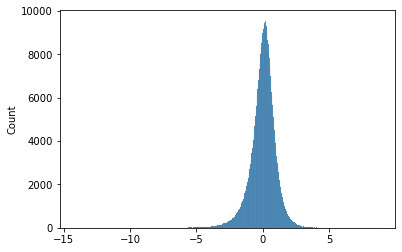

In [8]:
### We will plot the histogram of a randomly selected feature of the latents
seed = 0
np.random.seed(seed)
index_rand = np.random.randint(512)
sns.histplot(latents[:, index_rand])

### Let's do linear transformation to standarize the latent vector at first.
### For each component, we do $x_{std} = (x - \mu) / \sigma(x)$.

In [9]:
### Initialize the linear transformer at first
scaler = StandardScaler()
### Estimate the parameters
scaler.fit(latents)
### Transform the latents
latents_std = scaler.transform(latents)

In [10]:
### Let's use PCA at first to estimate the dimension of the main components. But before that, we want to standarize the latent vector
pca = PCA(n_components='mle', random_state=0)
pca.fit(latents_std)
singular_vals = pca.singular_values_

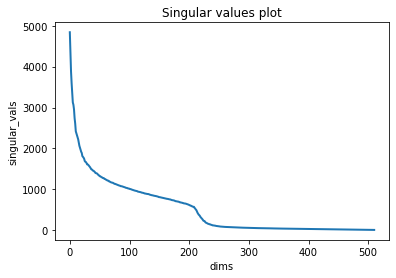

In [11]:
### plot the singular values to estimate the dimensions
plt.figure()
plt.title('Singular values plot')
plt.plot(singular_vals.squeeze(), linewidth=2)
plt.xlabel('dims')
plt.ylabel('singular_vals')
plt.show()

### From above plot, actually we can try to use the $dims = 300$ for the latent space.
### Here we use $dims = 256$.

In [12]:
pca = PCA(n_components=256, random_state=0)
pca.fit(latents_std)
latents_reduced = pca.transform(latents_std)
print(latents_reduced.shape)


(751689, 256)


In [13]:
### As a first try, let's try to use 'k-means' clustering.
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(latents_reduced)

KMeans(n_clusters=2, random_state=0)

<AxesSubplot:ylabel='Count'>

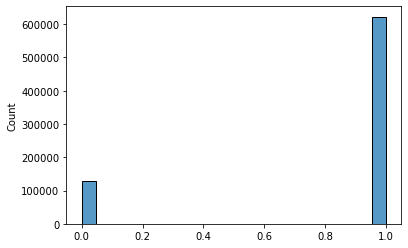

In [14]:
### Check the labels given by 'k-means'
sns.histplot(kmeans.labels_)

In [15]:
### Show the statistics of the 'clusters'
labels_df = pd.DataFrame(kmeans.labels_, columns=['predicted_label'])
labels_df.describe()

,predicted_label
count,751689.000000
mean,0.827969
std,0.377408
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


### From 'k-means', if we divide the data set into two groups, there are $82.8\%$ positive samples.
### But here we assume that there are $2$ clusters, actually we can explore the num of clusters.

In [16]:
###  color prepare
red_indices = np.argwhere(kmeans.labels_ == 1).squeeze()
blue_indices = np.argwhere(kmeans.labels_ == 0).squeeze()
#colors = [0] * kmeans.labels_.shape[0]
#colors[red_indices.squeeze()] = 'red'


Text(0.5, 1.0, 'Scatter plot of Reduced Latent Space')

/home/erdong/PycharmProjects/ulmo/venv_conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


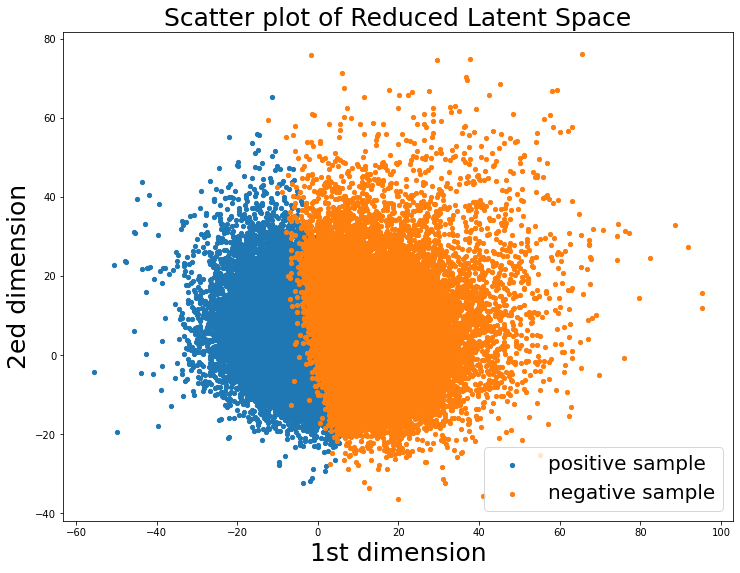

In [17]:
plt.figure(figsize=(12, 9))
plt.scatter(latents_reduced[:, 0][red_indices], latents_reduced[:, 1][red_indices.squeeze()],
            s=18, label='positive sample')
plt.scatter(latents_reduced[:, 0][blue_indices], latents_reduced[:, 1][blue_indices.squeeze()],
            s=18, label='negative sample')
plt.xlabel('1st dimension', fontsize=25)
plt.ylabel('2ed dimension', fontsize=25)
plt.legend(fontsize=20)
plt.title('Scatter plot of Reduced Latent Space', fontsize=25)

### We study the histogram of each cluster in the following part.


In [18]:
### At first let's get the index list of the latent vectors. Here we thank Prof. X for his nice 'matching' codes.
y2019 = evals_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2019_95clear_128x128_preproc_std.h5'
### Check the total number of the number of latents
print(np.sum(y2019))
### Get the index list of the latent vector
idx = evals_tbl[y2019].pp_idx.values

751689


### Now we can get the LL of the latent vector of 'idx' by using the following codes
### LL_2019 = evals_tbl[y2019].LL.values[idx]
### At first plot the histogram for the case with two clusters.

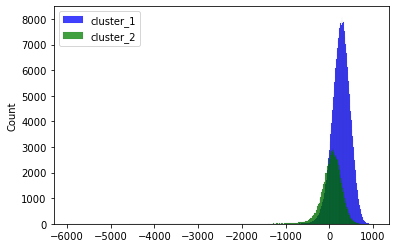

In [19]:
ll_cluster1 = evals_tbl[y2019].LL.values[idx[red_indices]]
ll_cluster2 = evals_tbl[y2019].LL.values[idx[blue_indices]]

sns.histplot(ll_cluster1, color='blue', label='cluster_1')
sns.histplot(ll_cluster2, color='green', label='cluster_2')
plt.legend()

In [20]:
### Show examples in each clusters
example_cluster1 = red_indices[random.sample(range(len(red_indices)), 1)]
example_cluster2 = blue_indices[random.sample(range(len(blue_indices)), 1)]
print(example_cluster1)
print(example_cluster2)

[404633]
[427417]


In [21]:
### Get the cutout
cutout1 = evals_tbl[y2019].iloc[example_cluster1]
cutout2 = evals_tbl[y2019].iloc[example_cluster2]

In [22]:
print(cutout1)
print(cutout2)

                lat        lon  col            datetime         LL   row  \
12010993  39.803917  144.51967  965 2019-08-02 16:40:00  48.487671  1424   

          clear_fraction  mean_temperature   Tmin       Tmax    T90     T10  \
12010993        0.020447           24.1604  22.34  25.764999  24.76  23.605   

                                      filename                  UID  \
12010993  AQUA_MODIS.20190802T164001.L2.SST.nc  1564129803932451967   

                                                    pp_file   pp_root  \
12010993  s3://modis-l2/PreProc/MODIS_R2019_2019_95clear...  standard   

          field_size  pp_type  pp_idx  
12010993         128        0  404633  
             lat        lon  col            datetime         LL  row  \
12033777  30.159  141.79166  355 2019-04-09 16:15:00  43.247986  513   

          clear_fraction  mean_temperature       Tmin    Tmax        T90  \
12033777        0.049377         19.653355  17.754999  21.385  20.359999   

                T10 

In [24]:
### plot the cutout
#from ulmo.modis import io as modis_io
#img = modis_io.grab_image(cutout1)
#from ulmo import plotting
#plotting.show_cutout(cutout1)
#plotting.show_cutout(cutout2)

### Studying the number of clusters as hyper-parameter

In [25]:
### We study the inertia of the k-means with different number of clusters.
inertia_list = []
for n_clusters in trange(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(latents_reduced)
    inertia_list.append(kmeans.inertia_)

100%|██████████| 8/8 [11:28<00:00, 86.00s/it] 


In [26]:
### Save the 'inertia_list'
inertia_df = pd.DataFrame(inertia_list, columns=['inertia'])
inertia_path = './inertia.csv'
inertia_csv = inertia_df.to_csv(inertia_path, index=False)

Text(0.5, 1.0, 'Study of num of clusters')

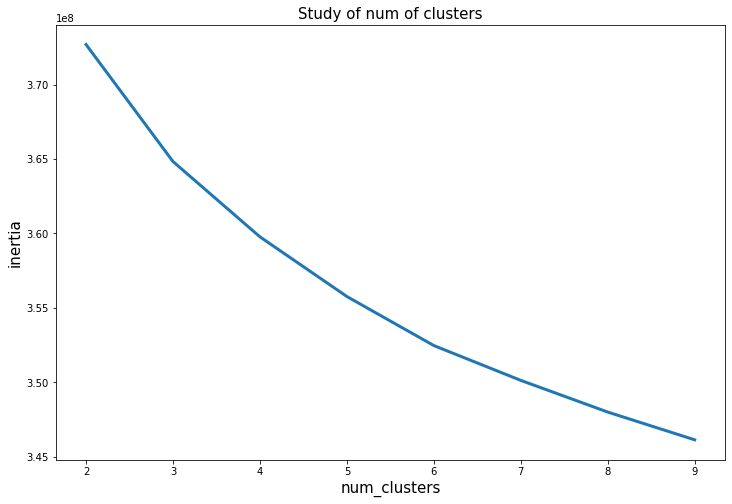

In [27]:
### Plot the 'inertia' vs 'num_clusters'
plt.figure(figsize=(12, 8))
num_clusters = list(range(2, 10))
plt.plot(num_clusters, inertia_list, linewidth=3)
plt.xlabel('num_clusters', fontsize=15)
plt.ylabel('inertia', fontsize=15)
plt.title('Study of num of clusters', fontsize=15)

### Show the scatter plot of the k-means with different number of clusters

In [28]:
### We show the k-means with $9$ clusters
### Show the histogram at first
labels_df = pd.DataFrame(kmeans.labels_, dtype='category', columns=['cluster_id'])
labels_df.describe()
labels_df.iloc[1]
#labels_df.astype(dtype='category')
#labels_df
#sns.histplot(kmeans.labels_)

cluster_id    1
Name: 1, dtype: category
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]

In [29]:
labels_df.groupby('cluster_id')['cluster_id'].describe()

,count,unique,top,freq
cluster_id,,,,
0,43769,1,0,43769
1,283251,1,1,283251
2,24950,1,2,24950
3,35070,1,3,35070
4,175437,1,4,175437
5,80313,1,5,80313
6,79508,1,6,79508
7,9380,1,7,9380
8,20011,1,8,20011


### From above summary, we find that the smallest group is 'cluster_8', the biggest group is 'cluster 2'.
### So let's plot the scatter of cluster '2' and '8'.

Text(0.5, 1.0, 'Scatter plot of 2 clusters')

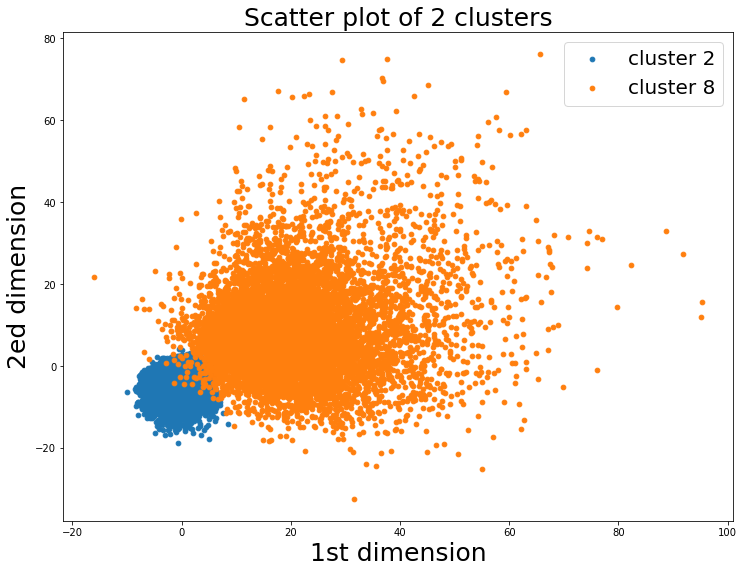

In [56]:
### Scatter plot
id2_indices = np.argwhere(kmeans.labels_ == 1).squeeze()
id8_indices = np.argwhere(kmeans.labels_ == 7).squeeze()

plt.figure(figsize=(12, 9))
plt.scatter(latents_reduced[:, 0][id2_indices], latents_reduced[:, 1][id2_indices],
            s=22, label='cluster 2')
plt.scatter(latents_reduced[:, 0][id8_indices], latents_reduced[:, 1][id8_indices],
            s=22, label='cluster 8')
plt.xlabel('1st dimension', fontsize=25)
plt.ylabel('2ed dimension', fontsize=25)
plt.legend(fontsize=20)
plt.title('Scatter plot of 2 clusters', fontsize=25)

Text(0.5, 1.0, 'Scatter plot of 3 clusters')

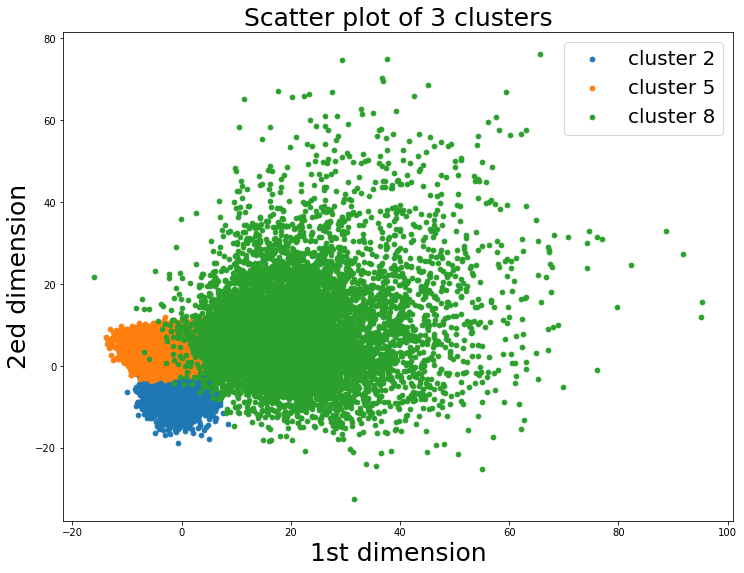

In [57]:
### Scatter plot of three clusters 'cluster 2', 'cluster 5' and 'cluster 8'.
id2_indices = np.argwhere(kmeans.labels_ == 1).squeeze()
id5_indices = np.argwhere(kmeans.labels_ == 4).squeeze()
id8_indices = np.argwhere(kmeans.labels_ == 7).squeeze()

plt.figure(figsize=(12, 9))
plt.scatter(latents_reduced[:, 0][id2_indices], latents_reduced[:, 1][id2_indices],
            s=22, label='cluster 2')
plt.scatter(latents_reduced[:, 0][id5_indices], latents_reduced[:, 1][id5_indices],
            s=22, label='cluster 5')
plt.scatter(latents_reduced[:, 0][id8_indices], latents_reduced[:, 1][id8_indices],
            s=22, label='cluster 8')
plt.xlabel('1st dimension', fontsize=25)
plt.ylabel('2ed dimension', fontsize=25)
plt.legend(fontsize=20)
plt.title('Scatter plot of 3 clusters', fontsize=25)


Text(0.5, 1.0, 'Scatter plot of 10 clusters')

/home/erdong/PycharmProjects/ulmo/venv_conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


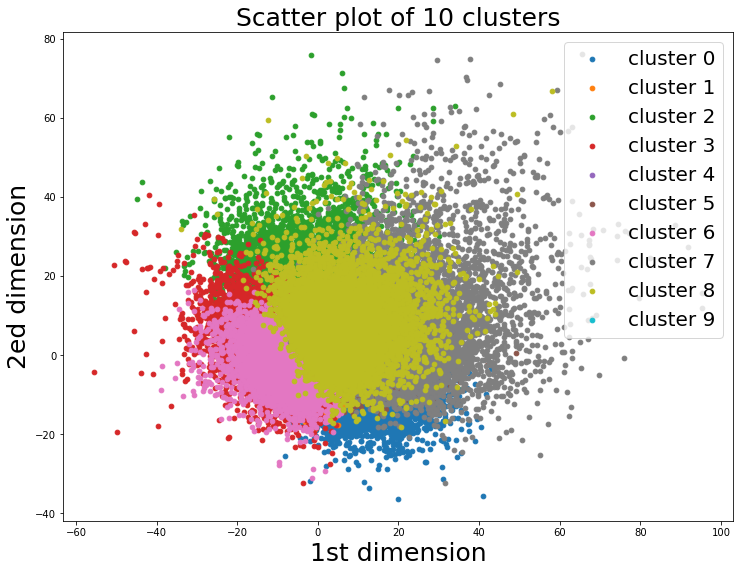

In [58]:
### Scatter plot of all clusters
plt.figure(figsize=(12, 9))
for k in range(10):
    idk_indices = np.argwhere(kmeans.labels_==k).squeeze()
    plt.scatter(latents_reduced[:, 0][idk_indices], latents_reduced[:, 1][idk_indices],
                s=22, label=f'cluster {k}')
plt.xlabel('1st dimension', fontsize=25)
plt.ylabel('2ed dimension', fontsize=25)
plt.legend(fontsize=20)
plt.title('Scatter plot of 10 clusters', fontsize=25)



### Plot the histogram of each cluster.

Text(0.5, 1.0, 'hist of ll with cluster_2 and cluster_8')

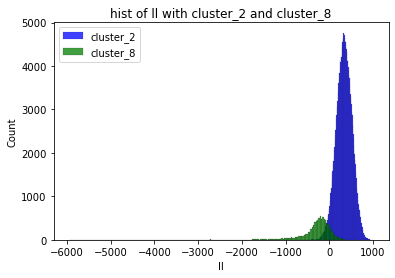

In [59]:
### We will plot the histogram of the two clusters.
ll_cluster_2 = evals_tbl[y2019].LL.values[idx[id2_indices]]
ll_cluster_8 = evals_tbl[y2019].LL.values[idx[id8_indices]]

sns.histplot(ll_cluster_2, color='blue', label='cluster_2')
sns.histplot(ll_cluster_8, color='green', label='cluster_8')
plt.xlabel('ll')
plt.legend()
plt.title('hist of ll with cluster_2 and cluster_8')

Text(0.5, 1.0, 'hist of ll with cluster_2 and cluster_8')

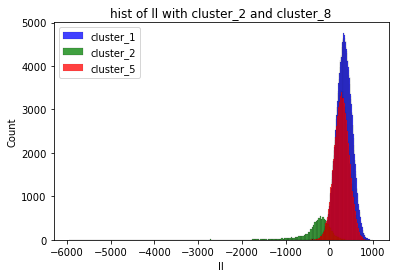

In [60]:
### We will plot the histogram of three clusters
ll_cluster_2 = evals_tbl[y2019].LL.values[idx[id2_indices]]
ll_cluster_5 = evals_tbl[y2019].LL.values[idx[id5_indices]]
ll_cluster_8 = evals_tbl[y2019].LL.values[idx[id8_indices]]

plt.figure()
sns.histplot(ll_cluster_2, color='blue', label='cluster_1')
sns.histplot(ll_cluster_8, color='green', label='cluster_2')
sns.histplot(ll_cluster_5, color='red', label='cluster_5')
plt.xlabel('ll')
plt.legend()
plt.title('hist of ll with cluster_2 and cluster_8')
#plt.savefig('./hist_3_cluster.pdf')